### Build a spam filter using Python and the multinomial Naive Bayes algorithm. 

Check Spam or Ham? Email Classifier Using Python using MultinomialNB.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import texthero as hero
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.ndim

2

In [9]:
df.shape

(5572, 2)

In [10]:
df.keys()

Index(['Category', 'Message'], dtype='object')

In [11]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [12]:
df.size

11144

In [13]:
df.dtypes

Category    object
Message     object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [17]:
df.isnull().any()

Category    False
Message     False
dtype: bool

In [18]:
df.notna().sum()

Category    5572
Message     5572
dtype: int64

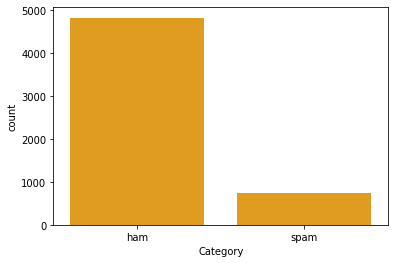

In [20]:
sns.countplot(df.Category,color='orange')
plt.show()

In [21]:
df['Message_Length'] = df['Message'].apply(len)

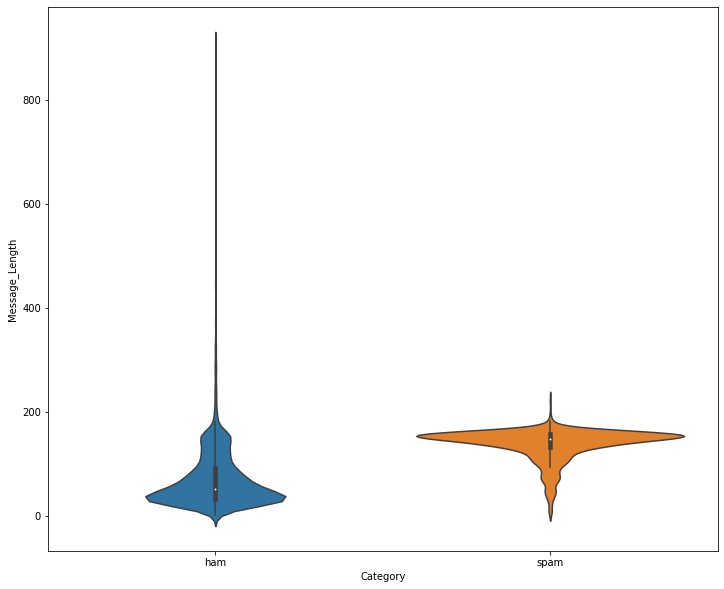

In [22]:
plt.figure(figsize=(12,10))
sns.violinplot(y='Message_Length',x='Category',data=df)
plt.show()

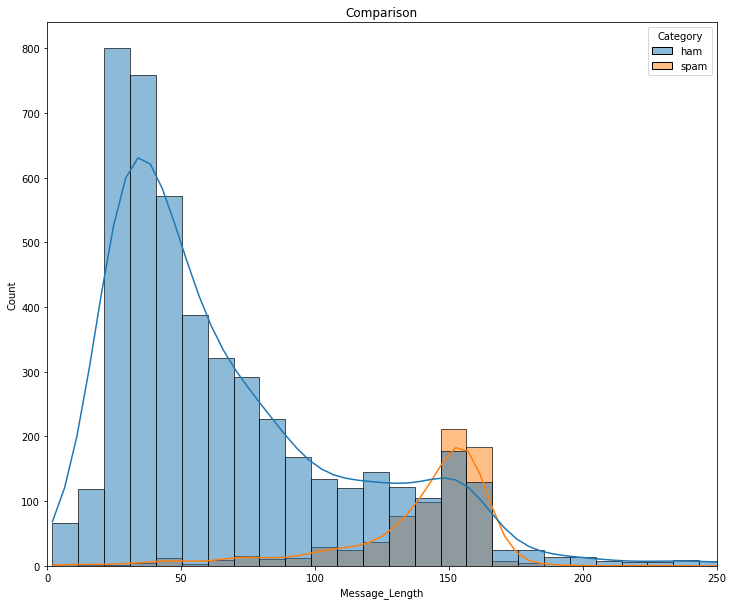

In [23]:
plt.figure(figsize=(12,10))
sns.histplot(x=df['Message_Length'],hue=df['Category'],kde=True)
plt.xlim((0,250))
plt.title('Comparison')
plt.show()

In [24]:
df['Message'] = hero.clean(df['Message'])

In [25]:
df.head()

,Category,Message,Message_Length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts 21s...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah think goes usf lives around though,61


In [26]:
from yellowbrick.target import FeatureCorrelation, BalancedBinningReference, ClassBalance
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
le = LabelEncoder()

In [27]:
df.Category = le.fit_transform(df.Category)

In [28]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [29]:
df.head()

,Category,Message,Message_Length
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry wkly comp win fa cup final tkts 21s...,155
3,0,u dun say early hor u c already say,49
4,0,nah think goes usf lives around though,61


In [30]:
tf = df['Message'].copy()
vector = TfidfVectorizer('english')
X = vector.fit_transform(tf)
y = df['Category']

In [31]:
X[:7]

<7x8014 sparse matrix of type '<class 'numpy.float64'>'
	with 74 stored elements in Compressed Sparse Row format>

In [32]:
y[:7]

0    0
1    0
2    1
3    0
4    0
5    1
6    0
Name: Category, dtype: int64

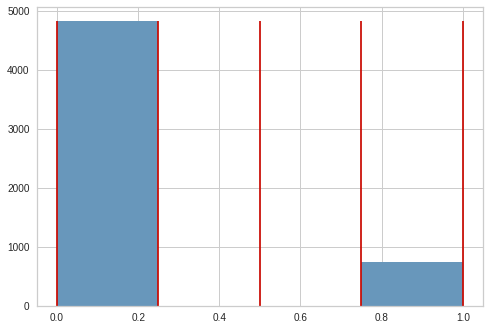

In [33]:
visual = BalancedBinningReference()
visual.fit(y)
plt.show()

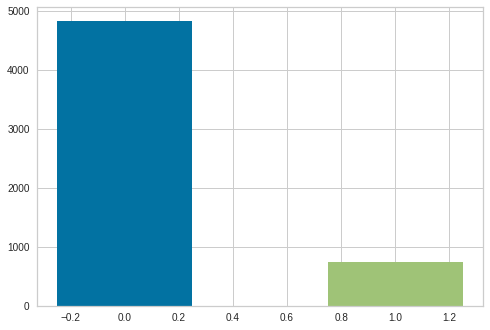

In [34]:
classes = le.classes_
viz = ClassBalance(labels=classes,colors=['blue','red'])
viz.fit(y)
plt.show()

## Data Spliting and Naive Bayes Classification

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=34)

In [36]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, classification_report, confusion_matrix
from yellowbrick.classifier import class_prediction_error

In [37]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
y_pred = mnb.predict(X_test)

# Classification_report, accuracy score, precision score, f1_score and confusion matrix

In [39]:
acc = accuracy_score(y_test,y_pred)
acc

0.968609865470852

In [40]:
error = 1 - acc
error

0.03139013452914796

In [41]:
re_sc = recall_score(y_test,y_pred)
re_sc

0.7635135135135135

In [42]:
f1 = f1_score(y_test,y_pred)
f1

0.8659003831417624

In [43]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[967,   0],
       [ 35, 113]])

In [44]:
clf = classification_report(y_test,y_pred)
clf

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98       967\n           1       1.00      0.76      0.87       148\n\n    accuracy                           0.97      1115\n   macro avg       0.98      0.88      0.92      1115\nweighted avg       0.97      0.97      0.97      1115\n'

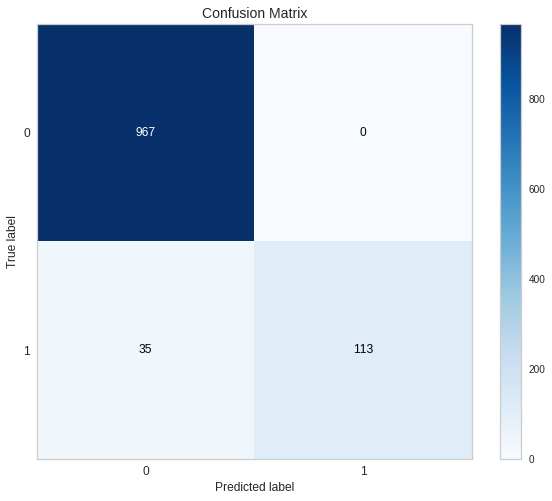

In [45]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,8),title_fontsize=14)
plt.show()